<a href="https://www.kaggle.com/code/iahhel/dogecoin-price-prediction-xgboost-gridsearchcv?scriptVersionId=137241092" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# In this project, I analyzed a dataset related to the popular cryptocurrency Dogecoin using the XGBoost machine learning model. The goal of this analysis was to identify patterns and trends in the data that could provide insights into the behavior of Dogecoin users and investors, as well as to make predictions about future market trends.



<table align="left">
    <td>
        <a href="https://www.kaggle.com/code/iahhel/dogecoin-price-prediction-xgboost-gridsearchcv">
            <img width="70" src="https://www.kaggle.com/static/images/logos/kaggle-logo-transparent-300.png" alt="Kaggle logo">
            Open In Kaggle
        </a>
    </td>
    <td>
        <a href="https://colab.research.google.com/drive/1XJM_snFbNABpwOM8UDWKBeNccRdeK0D3?usp=sharing">
            <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Colab logo">
            Run In Colab
        </a>
    </td>
    <td>
        <a href="https://github.com/BehnamMrad/dogecoin-price-prediction/blob/main/dogecoin.ipynb">
            <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
            View On GitHub
        </a>
    </td>
</table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import xgboost as xgb
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = pd.read_csv('/kaggle/input/cryptocurrencypricehistory/coin_Dogecoin.csv')
print(train.shape)
train.head()

(2760, 10)


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


In [3]:
print(train.info())
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2760 non-null   int64  
 1   Name       2760 non-null   object 
 2   Symbol     2760 non-null   object 
 3   Date       2760 non-null   object 
 4   High       2760 non-null   float64
 5   Low        2760 non-null   float64
 6   Open       2760 non-null   float64
 7   Close      2760 non-null   float64
 8   Volume     2760 non-null   float64
 9   Marketcap  2760 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 215.8+ KB
None


,SNo,High,Low,Open,Close,Volume,Marketcap
count,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2.760000e+03,2.760000e+03
mean,1380.500000,0.014964,0.012402,0.013669,0.013763,4.326321e+08,1.760533e+09
std,796.887696,0.069103,0.055536,0.062347,0.062559,2.807320e+09,8.115186e+09
min,1.000000,0.000089,0.000085,0.000087,0.000087,0.000000e+00,1.509085e+06
25%,690.750000,0.000231,0.000222,0.000227,0.000226,2.536138e+05,2.337892e+07
50%,1380.500000,0.001914,0.001772,0.001849,0.001844,5.582480e+06,2.135789e+08
75%,2070.250000,0.002986,0.002796,0.002900,0.002899,5.098244e+07,3.488812e+08
max,2760.000000,0.737567,0.608168,0.687801,0.684777,6.941068e+10,8.868082e+10


In [4]:
train.index = pd.to_datetime(train['Date'])
train = train.iloc[:,4:8] # had to drop some useful features to match the test data
train.index

DatetimeIndex(['2013-12-16 23:59:59', '2013-12-17 23:59:59',
               '2013-12-18 23:59:59', '2013-12-19 23:59:59',
               '2013-12-20 23:59:59', '2013-12-21 23:59:59',
               '2013-12-22 23:59:59', '2013-12-23 23:59:59',
               '2013-12-24 23:59:59', '2013-12-25 23:59:59',
               ...
               '2021-06-27 23:59:59', '2021-06-28 23:59:59',
               '2021-06-29 23:59:59', '2021-06-30 23:59:59',
               '2021-07-01 23:59:59', '2021-07-02 23:59:59',
               '2021-07-03 23:59:59', '2021-07-04 23:59:59',
               '2021-07-05 23:59:59', '2021-07-06 23:59:59'],
              dtype='datetime64[ns]', name='Date', length=2760, freq=None)

In [5]:
def create_features(df):
  df['dayofweek'] = df.index.day_of_week
  df['month'] = df.index.month
  df['dayofyear'] = df.index.dayofyear
  return df
train = create_features(train)
train.head()

,High,Low,Open,Close,dayofweek,month,dayofyear
Date,,,,,,,
2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0,12,350
2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,1,12,351
2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,2,12,352
2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,3,12,353
2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,4,12,354


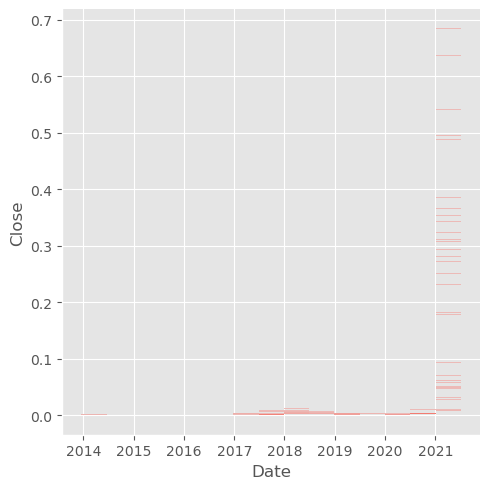

In [6]:
sns.displot(data=train,x=train.index ,y='Close')

<Axes: xlabel='Date'>

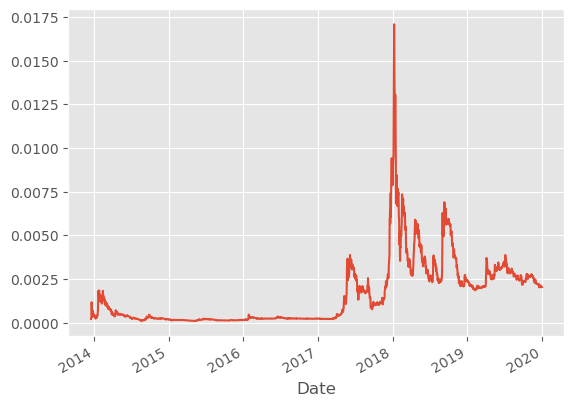

In [7]:
train['Close'].loc[(train.index < '01-01-2020')].plot()

<Axes: xlabel='Date'>

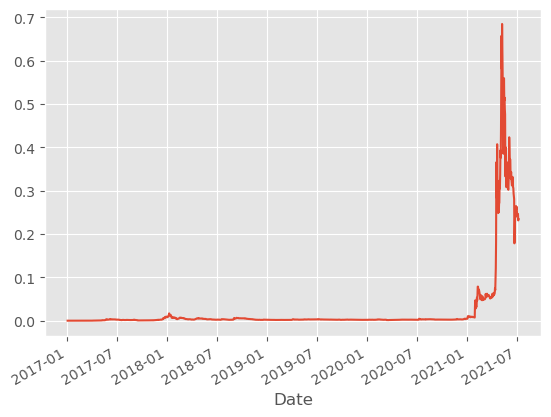

In [8]:
train['Close'].loc[train.index > '01-01-2017'].plot()

Loading a new dataset that starts from 2021-7-7, where our training data ended, and using it as our test data.

In [9]:
test = pd.read_csv('/kaggle/input/dogecoinhistoricalprice/dogecoin.csv')
# data cleaning
test = test.iloc[::-1].reset_index(drop=True)
test.index = pd.to_datetime(test['Date'])
test.rename({'Price':'Close'},axis=1,inplace=True)
test.drop(['Date','Vol.','Change %'],axis=1,inplace=True)
test = test[['High','Low','Open','Close']]
test = create_features(test)
extended_df = train.append(test) # merging both train and test data and storing it in extended_df variable.
test

,High,Low,Open,Close,dayofweek,month,dayofyear
Date,,,,,,,
2021-07-07,0.236157,0.219121,0.233139,0.222236,2,7,188
2021-07-08,0.222825,0.204676,0.222249,0.207422,3,7,189
2021-07-09,0.228825,0.195927,0.207422,0.219272,4,7,190
2021-07-10,0.227071,0.209778,0.219219,0.213355,5,7,191
2021-07-11,0.218014,0.210114,0.213362,0.214666,6,7,192
...,...,...,...,...,...,...,...
2023-01-18,0.089473,0.079614,0.082806,0.080059,2,1,18
2023-01-19,0.082122,0.079946,0.080042,0.081613,3,1,19
2023-01-20,0.086979,0.080688,0.081607,0.086305,4,1,20


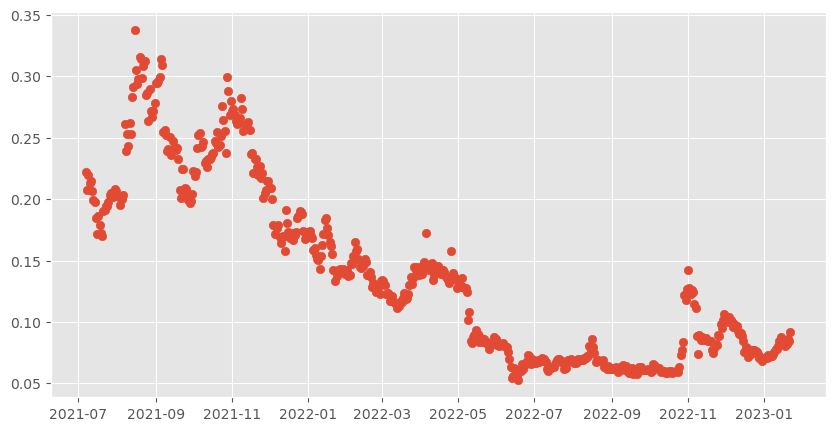

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(data=test, x = test.index, y = 'Close')

Text(0.5, 1.0, 'Close price by month. 2021-07-07 to 2023-01-22 (test data)')

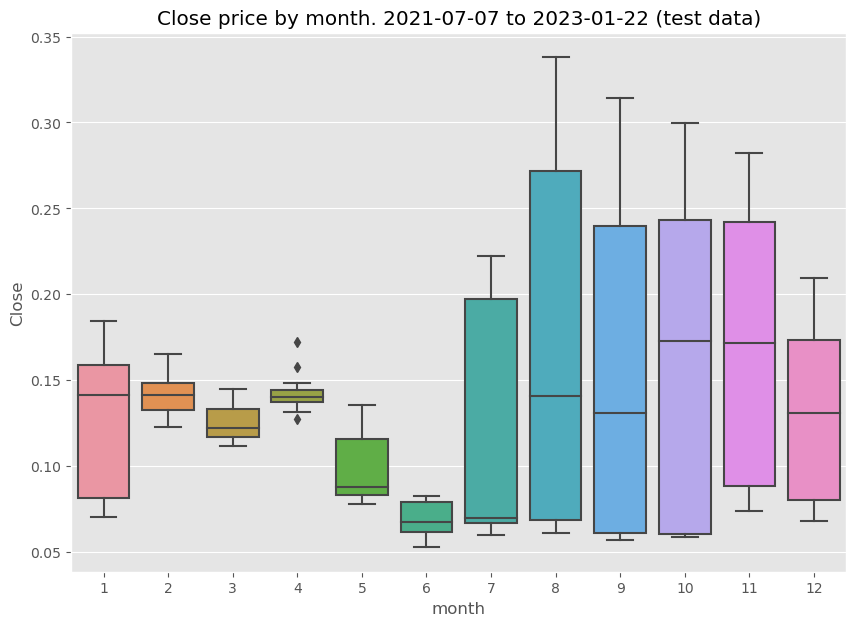

In [11]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(data=test,x='month',y='Close')
ax.set_title('Close price by month. 2021-07-07 to 2023-01-22 (test data)')

#**Creating the model**

In [12]:
# since we using "High" ,"Low" and "Open" features, its not considered time-series forecasting,
# but we'll still use our time-series features regardless of it's impact on the model.
FEATURES = ['High','Low','Open','dayofweek','month','dayofyear']
TARGET = 'Close'

In [13]:
xtrain = train[FEATURES]
ytrain = train[TARGET]

xtest = test[FEATURES]
ytest = test[TARGET]

using GridSearchCV to find the best parameters to use within our XGBoost model.

In [14]:
params = { 'max_depth': [3,4,5,6],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7],
           'early_stopping_rounds':[20,50,100],
           'objective':['reg:squarederror']}

# Splitting into training and validation sets
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)

xgbr1 = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr1, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

clf.fit(xtrain, ytrain, eval_set=[(xval, yval)], verbose=False)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'colsample_bytree': 0.7, 'early_stopping_rounds': 20, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'objective': 'reg:squarederror'}
Lowest RMSE:  0.006845374892981351


In [15]:
xgbr = xgb.XGBRegressor(**clf.best_params_, seed = 20)

xgbr.fit(xtrain, ytrain, eval_set=[(xval, yval)], verbose=100)

[0]	validation_0-rmse:0.44197
[99]	validation_0-rmse:0.00268


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=20,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

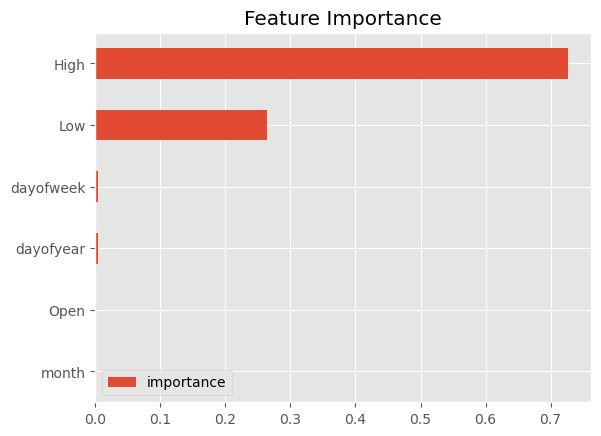

In [16]:
# making a feature importance dataframe and plot it to visualize the impact of each feature on the model.
fi = pd.DataFrame(data=xgbr.feature_importances_, 
             index=xgbr.get_booster().feature_names,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [17]:
# adding the prediction column to the test data, then merging it with the entire dataframe to visually compare results.
test['predictions'] = xgbr.predict(xtest)
extended_df = extended_df.merge(test[['predictions']], how='left', left_index=True, right_index=True)
extended_df.tail(10)

,High,Low,Open,Close,dayofweek,month,dayofyear,predictions
Date,,,,,,,,
2023-01-13,0.085061,0.078972,0.080287,0.084515,4,1,13,0.079674
2023-01-14,0.092126,0.084186,0.084519,0.087368,5,1,14,0.100022
2023-01-15,0.087770,0.082923,0.087297,0.086112,6,1,15,0.087770
2023-01-16,0.088064,0.081928,0.086111,0.083687,0,1,16,0.086633
2023-01-17,0.084890,0.082382,0.083687,0.082799,1,1,17,0.086633
2023-01-18,0.089473,0.079614,0.082806,0.080059,2,1,18,0.079659
2023-01-19,0.082122,0.079946,0.080042,0.081613,3,1,19,0.072542
2023-01-20,0.086979,0.080688,0.081607,0.086305,4,1,20,0.079674
2023-01-21,0.088987,0.084370,0.086296,0.084605,5,1,21,0.086648


and at last, model evaluation.

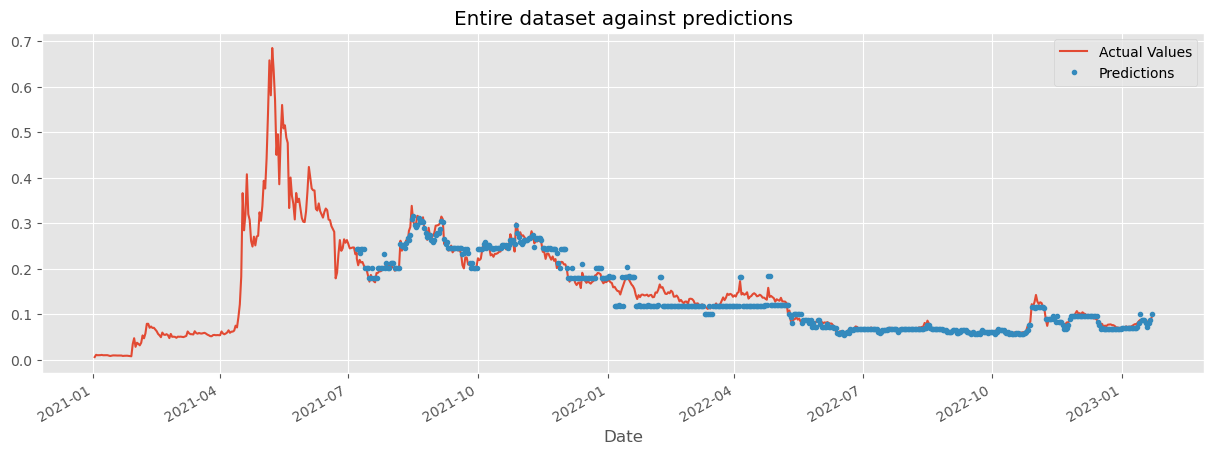

In [18]:
ax = extended_df['Close'].loc[extended_df.index > '01-01-2021'].plot(figsize=(15, 5))
extended_df['predictions'].plot(ax=ax, style='.')
plt.legend(['Actual Values', 'Predictions'])
ax.set_title('Entire dataset against predictions')
plt.show()

In [19]:
score = np.sqrt(mean_squared_error(test['Close'], test['predictions']))
print(f'RMSE Score on Test set: {score:0.3f}')

RMSE Score on Test set: 0.013


finding the best and the worst predictions

In [20]:
test['error']=np.abs(test[TARGET] - test['predictions'])
test['date'] = test.index.date
print("Worst predictions")
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

Worst predictions


date
2022-04-26    0.047112
2022-01-12    0.044556
2022-01-06    0.041863
2022-02-09    0.041789
2022-04-06    0.038845
2022-01-07    0.036648
2021-07-08    0.036550
2021-07-12    0.035950
2021-12-01    0.034625
2022-02-06    0.034562
Name: error, dtype: float64

In [21]:
print("Best predictions")
test.groupby(['date'])['error'].mean().sort_values(ascending=True).head(10)

Best predictions


date
2022-09-06    0.000013
2022-06-17    0.000015
2022-08-02    0.000015
2022-10-12    0.000029
2022-06-11    0.000047
2022-07-12    0.000059
2022-07-02    0.000059
2022-09-10    0.000092
2022-12-09    0.000095
2021-10-23    0.000096
Name: error, dtype: float64